In [1]:
# ---------- imports ----------
import matplotlib.pyplot as plt, seaborn as sns
import missingno as msno
import pandas as pd
from pathlib import Path

# ---------- path setup ----------
csv_path = Path(r"C:\Users\SIMBY\Documents\climate_nasa.csv")

# ---------- load ----------
df = pd.read_csv(csv_path)
print("Shape:", df.shape)
display(df.head())


Shape: (522, 5)


,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [2]:
# ---------- dataset info ----------
print(df.info())
display(df.describe(include="all"))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB
None


,date,likesCount,profileName,commentsCount,text
count,522,522.000000,522,244.000000,504
unique,522,NaN,483,NaN,503
top,2022-09-07T17:12:32.000Z,NaN,fbc7d1a96db0c682c8caaaf292d13527b1483b341da109...,NaN,The “greenhouse effect” is concerned with the ...
freq,1,NaN,3,NaN,2
mean,NaN,4.720307,NaN,8.696721,NaN
std,NaN,12.053556,NaN,12.266176,NaN
min,NaN,0.000000,NaN,1.000000,NaN
25%,NaN,0.000000,NaN,2.000000,NaN
50%,NaN,1.000000,NaN,5.000000,NaN
75%,NaN,4.000000,NaN,10.000000,NaN


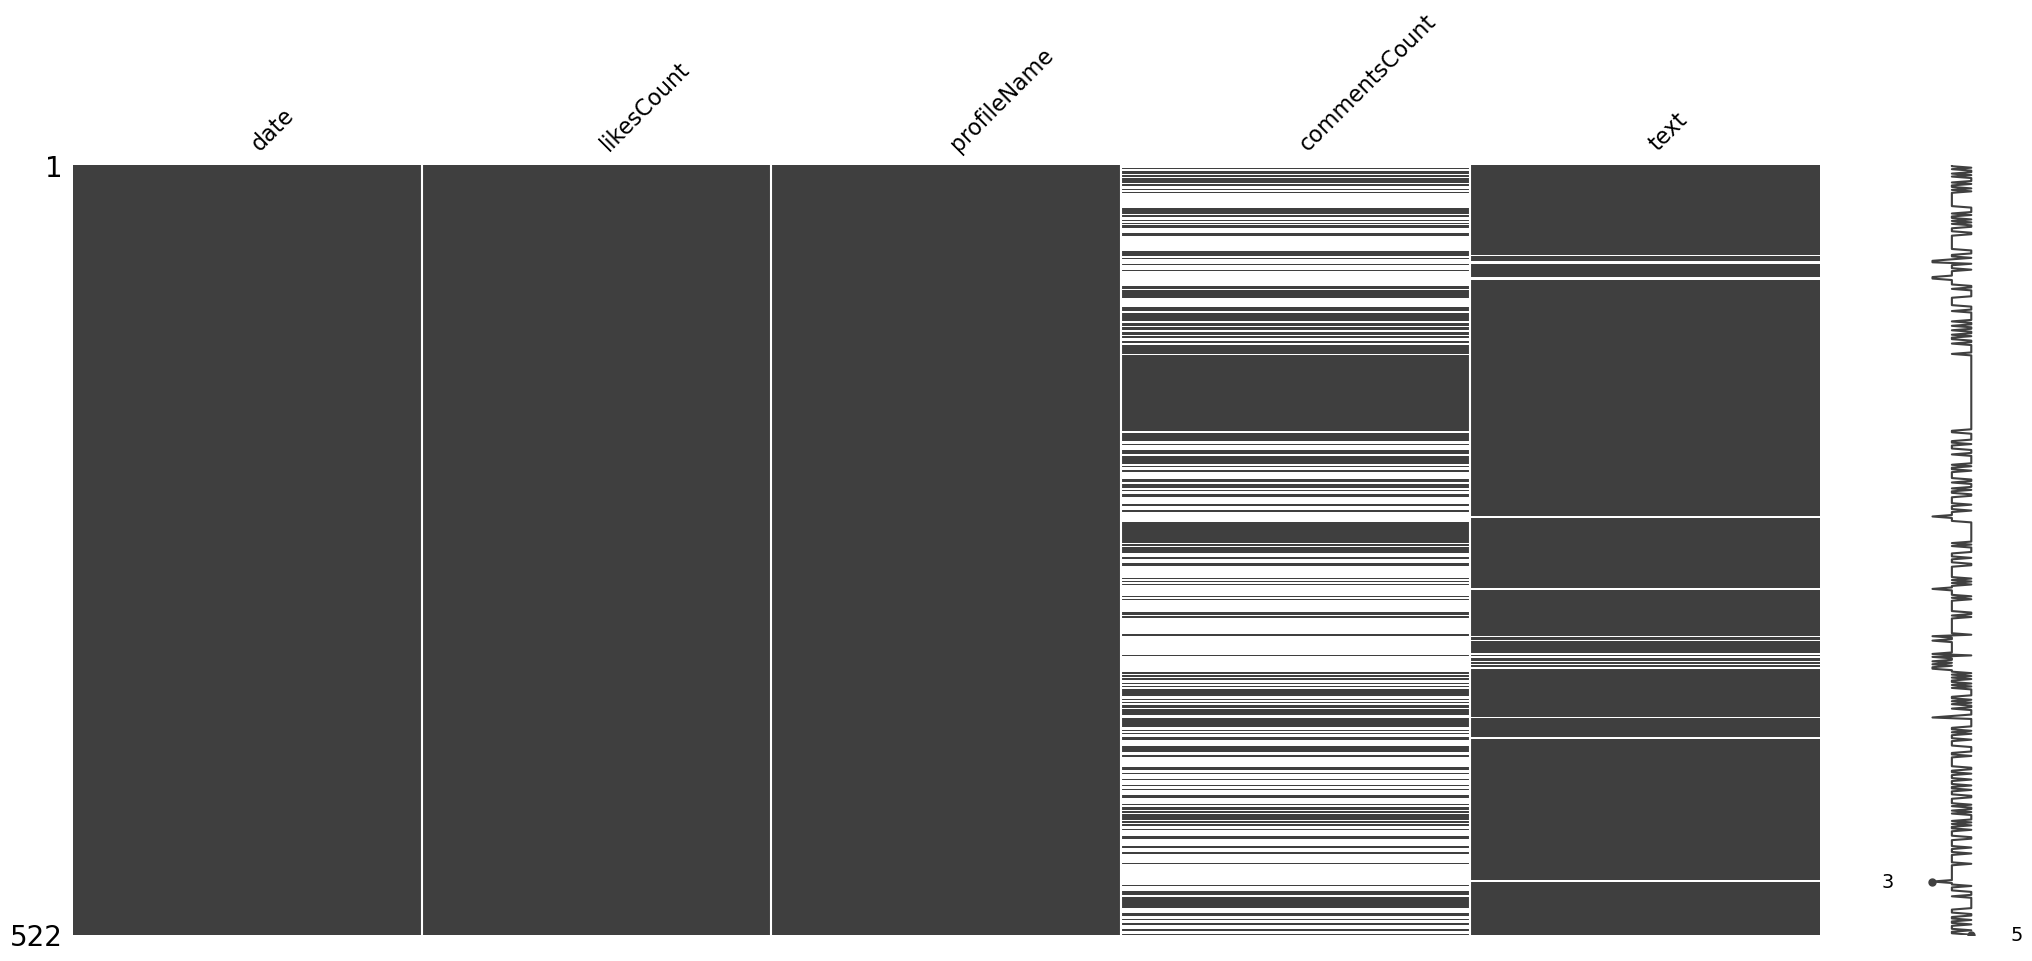

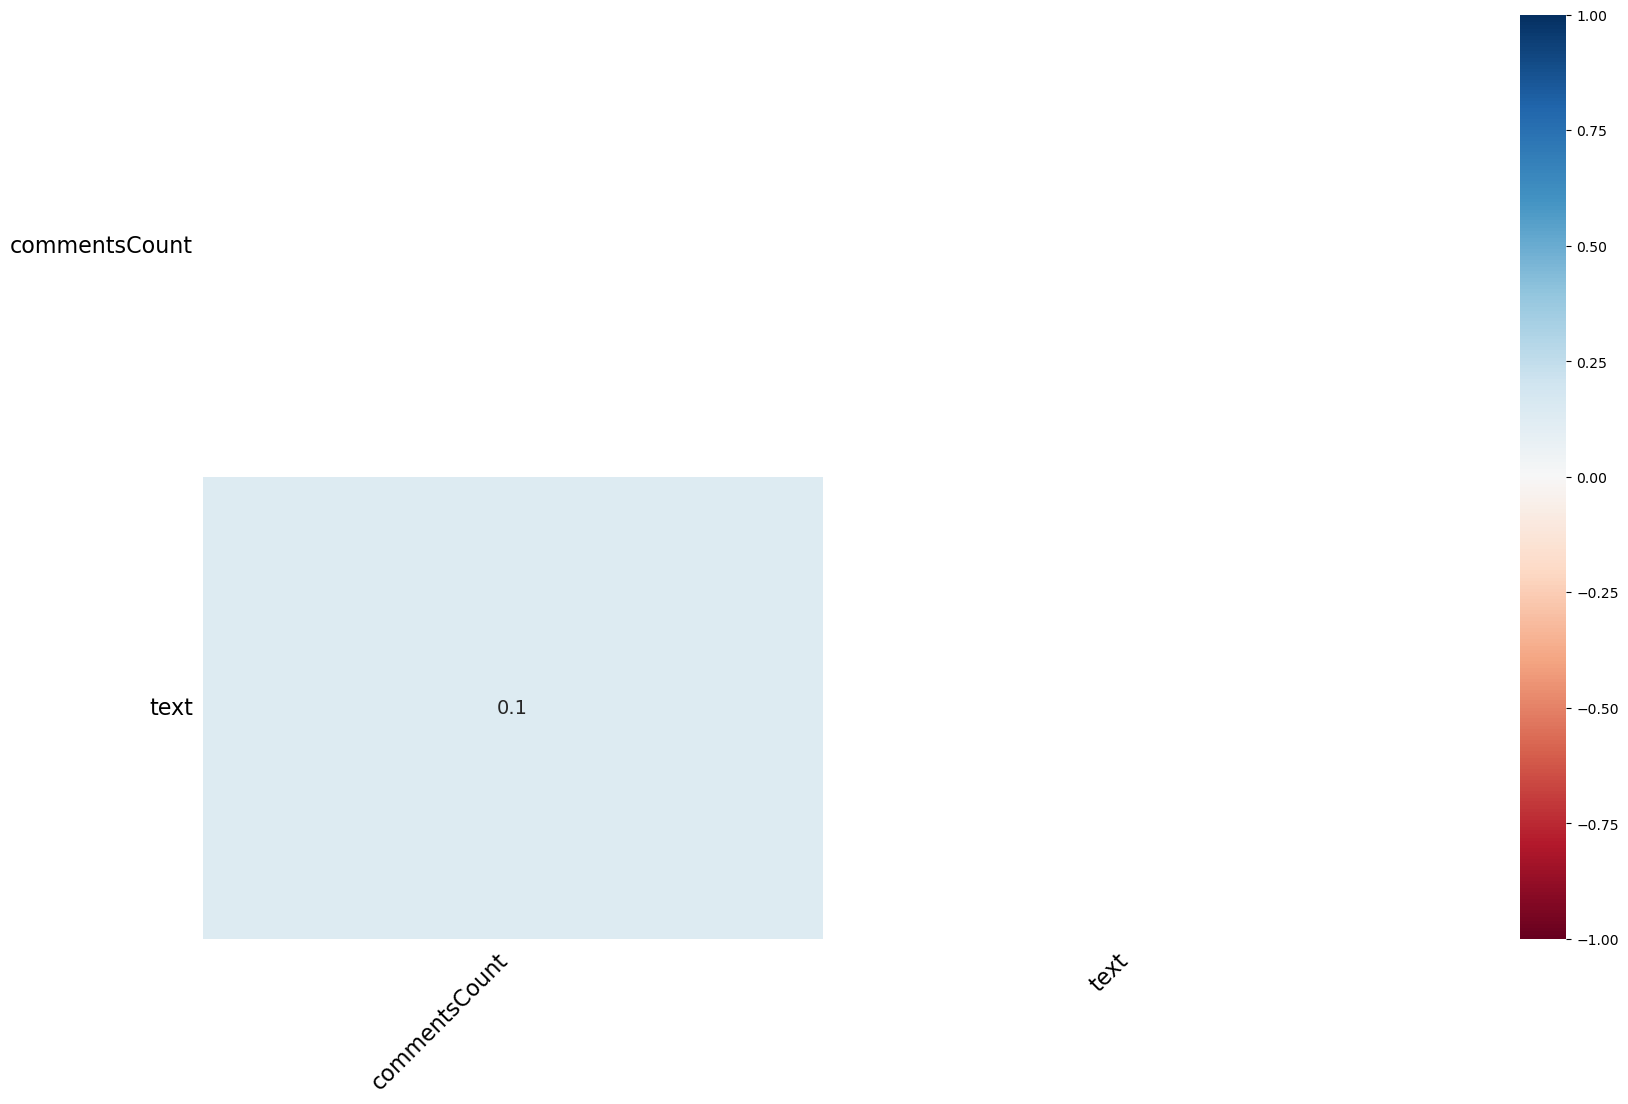

In [3]:
# ---------- missing values ----------
msno.matrix(df)
plt.show()

msno.heatmap(df)
plt.show()


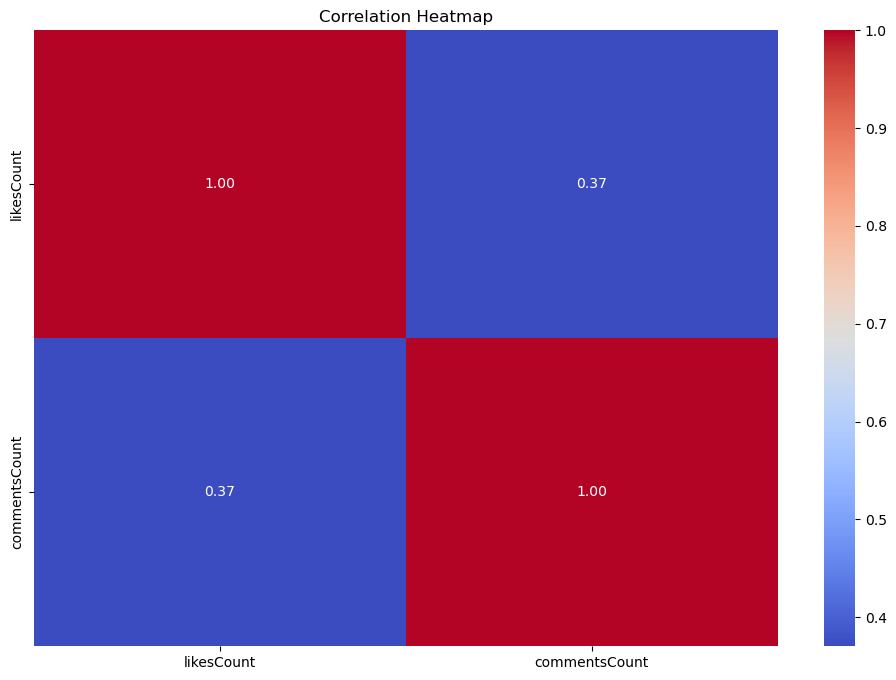

In [4]:
# ---------- correlation heatmap ----------
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


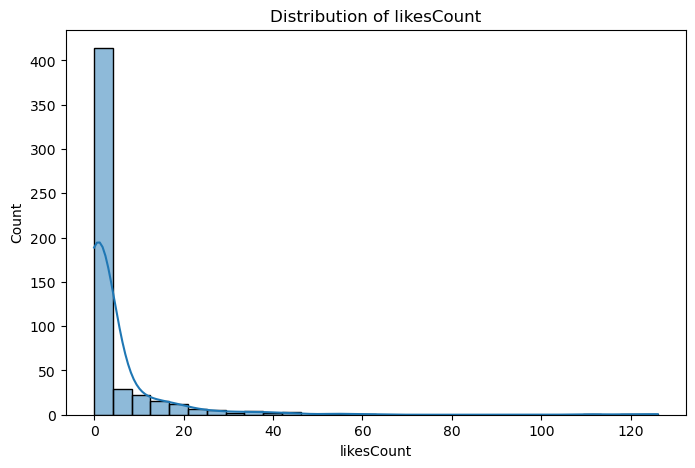

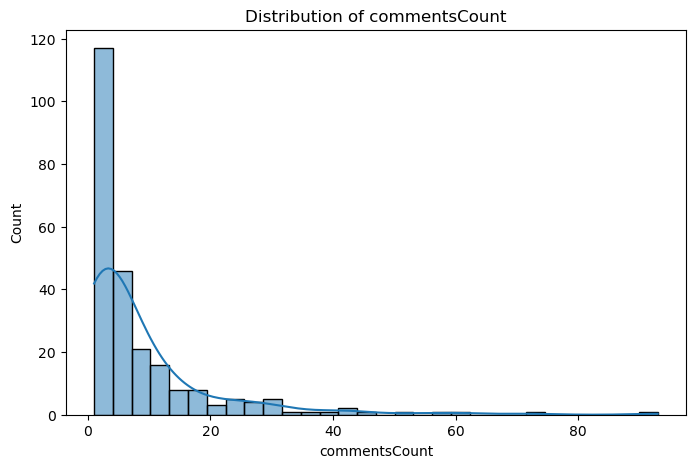

In [5]:
# ---------- distributions ----------
num_cols = df.select_dtypes(include="number").columns

for col in num_cols[:5]:  # show first 5 numeric columns
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


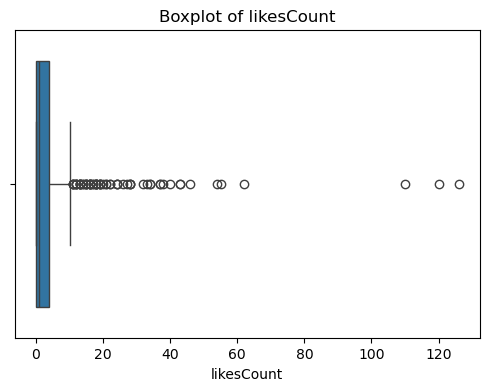

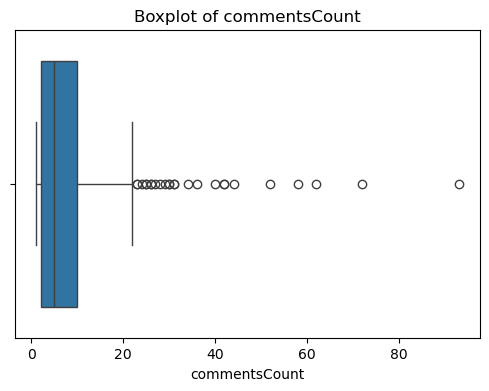

In [6]:
# ---------- boxplots ----------
for col in num_cols[:5]:  # again limit to first 5 for readability
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [8]:
# ---------- time series trends ----------
if "year" in df.columns:
    plt.figure(figsize=(12,6))
    sns.lineplot(data=df, x="year", y=num_cols[0])  # first numeric col vs year
    plt.title(f"{num_cols[0]} over Years")
    plt.show()

if "month" in df.columns and num_cols.size > 1:
    plt.figure(figsize=(12,6))
    sns.lineplot(data=df, x="month", y=num_cols[1])
    plt.title(f"{num_cols[1]} over Months")
    plt.show()


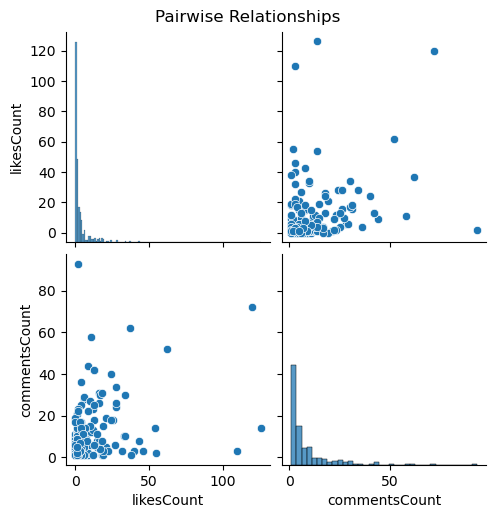

In [9]:
# ---------- pairplot ----------
sns.pairplot(df[num_cols[:4]])  # first 4 numeric columns
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()
